# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

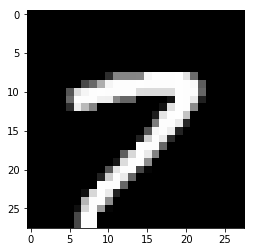

In [3]:
img = mnist.train.images[123]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=[None, 784], name='inputs')
targets_ = tf.placeholder(tf.float32, shape=[None, 784])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs = inputs_,
                          units = encoding_dim,
                          activation = tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(inputs = encoded,
                         units = 784,
                         activation = None)

# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = targets_,
                                              logits = logits)

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
import sys
sys.version

'3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]'

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs), "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6955
Epoch: 1/20... Training loss: 0.6919
Epoch: 1/20... Training loss: 0.6885
Epoch: 1/20... Training loss: 0.6852
Epoch: 1/20... Training loss: 0.6816
Epoch: 1/20... Training loss: 0.6767
Epoch: 1/20... Training loss: 0.6718
Epoch: 1/20... Training loss: 0.6649
Epoch: 1/20... Training loss: 0.6577
Epoch: 1/20... Training loss: 0.6498
Epoch: 1/20... Training loss: 0.6407
Epoch: 1/20... Training loss: 0.6295
Epoch: 1/20... Training loss: 0.6180
Epoch: 1/20... Training loss: 0.6046
Epoch: 1/20... Training loss: 0.5902
Epoch: 1/20... Training loss: 0.5782
Epoch: 1/20... Training loss: 0.5603
Epoch: 1/20... Training loss: 0.5435
Epoch: 1/20... Training loss: 0.5306
Epoch: 1/20... Training loss: 0.5101
Epoch: 1/20... Training loss: 0.4916
Epoch: 1/20... Training loss: 0.4766
Epoch: 1/20... Training loss: 0.4576
Epoch: 1/20... Training loss: 0.4442
Epoch: 1/20... Training loss: 0.4264
Epoch: 1/20... Training loss: 0.4160
Epoch: 1/20... Training loss: 0.4005
E

Epoch: 1/20... Training loss: 0.1854
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1810
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1833
Epoch: 1/20... Training loss: 0.1818
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1805
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1834
Epoch: 1/20... Training loss: 0.1815
Epoch: 1/20... Training loss: 0.1754
Epoch: 1/20... Training loss: 0.1840
E

Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1459
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1476
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1480
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1430
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1454
Epoch: 2/20... Training loss: 0.1488
Epoch: 2/20... Training loss: 0.1478
Epoch: 2/20... Training loss: 0.1439
Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1484
Epoch: 2/20... Training loss: 0.1426
Epoch: 2/20... Training loss: 0.1458
Epoch: 2/20... Training loss: 0.1447
Epoch: 2/20... Training loss: 0.1470
Epoch: 2/20... Training loss: 0.1480
E

Epoch: 3/20... Training loss: 0.1272
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1220
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1250
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1268
Epoch: 3/20... Training loss: 0.1260
Epoch: 3/20... Training loss: 0.1276
Epoch: 3/20... Training loss: 0.1258
Epoch: 3/20... Training loss: 0.1253
Epoch: 3/20... Training loss: 0.1264
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1304
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1273
Epoch: 3/20... Training loss: 0.1247
Epoch: 3/20... Training loss: 0.1281
Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1244
Epoch: 3/20... Training loss: 0.1232
Epoch: 3/20... Training loss: 0.1242
E

Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1185
E

Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1035
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1042
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1061
E

Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.0986
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.0997
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1003
E

Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0944
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1001
E

Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1030
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0972
E

Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.1014
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0968
E

Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.1006
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.1003
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0881
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0981
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0889
Epoch: 17/20... Training loss: 0.0986
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0893
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0983
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0884
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

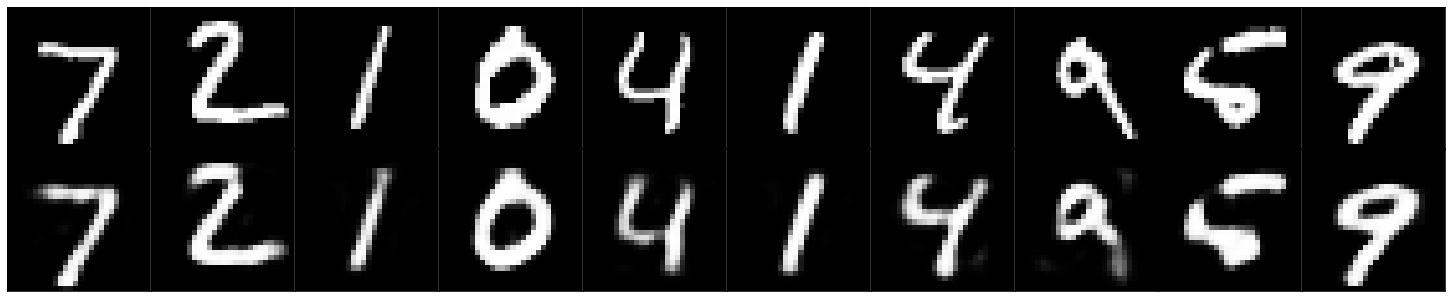

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.